# Queueing theory - M/M/1 example

### 1. Imports

In [1]:
import openqtsim

### 2. Prepare inputs

In [2]:
# Basic input
t_scale = 1 # 1: hours, 60: minutes, 3600: seconds, etc
Lambda = 8
Mu = 9

In [3]:
# Create Arrival and Service processes and specify the number of servers
A = openqtsim.ArrivalProcess("M", arr_rate=Lambda, t_scale=t_scale)
S = openqtsim.ServiceProcess("M", srv_rate=Mu, t_scale=t_scale)
c = 1

In [4]:
# Create the queue object and use it to create a simulating object
q = openqtsim.Queue(A, S, c)
sim = openqtsim.Simulation(q, t_scale=t_scale, seed=1)

### 3. Run the simulation

In [5]:
# set stop limits
tol = 0.0001
max_arr = 50000

In [6]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

# run simulation - simulation stops either when max arrivals is reached or the tolerance limits are achieved
sim.run(max_arr=max_arr, IAT_tol=tol, ST_tol=tol) 

Start simulation of "M/M/1/inf/inf/FIFO" queue

Nr of customers: 10777
Accuracy IAT: 9.519399568647113e-05
Tolerance: 0.0001
Accuracy ST: 9.643113860524632e-05
Tolerance: 0.0001

Wall time: 15.2 s


### 4. Analyse and visualise results

#### Get statistics

In [7]:
print('--- input statistics --------')
print("aver_IAT_in_secs: {:.4f} [hour]".format(1/Lambda))
print("aver_ST_in_secs: {:.4f} [hour]".format(1/Mu))
print('')

print('--- simulation statistics ---')
sim.get_stats()

--- input statistics --------
aver_IAT_in_secs: 0.1250 [hour]
aver_ST_in_secs: 0.1111 [hour]

--- simulation statistics ---
Average IAT: 0.1249 [hours]
Average ST: 0.1112 [hours]
Rho: System utilisation: 0.8902

Total number of customers: 10777.00

W_s: Average time spent in the system: 0.85 [hours]
W_q: Average time spent in the queue: 0.74 [hours]
Average nr arrivals: 8.00 [# per hour]
Average nr services: 8.99 [# per hour]

Total waiting time: 7957.1539 [hours]
Average waiting time of all customers: 0.74 [hours]
Average waiting time of customers that waited: 0.83 [hours]

P_0: Probability of idle server (nobody in the system): 0.1098
Probability that somebody is waiting: 0.8917
Probability that nobody is waiting: 0.1083
P_2: Probability that 1 person is waiting: 0.1051
P_3: Probability that 2 persons are waiting: 0.0886
P_4: Probability that 3 persons are waiting: 0.0766
P_10: Probability that 9 persons are waiting (10 in system): 0.0423

Average waiting time as a fraction of ST: 6.

**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average time spent in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

#### Return log

In [8]:
sim.return_log()
# c = customer
# IAT = inter arrival time
# ST = service time
# AT = arrival time
# TSB = time service begins
# TSE = time service ends
# TCSS = time customer spends in the system
# TCWQ = time customer waits in the queue
# ITS = idle time of the server
# QL = queue length

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,QL
0,1,0.067451,0.000013,0.067451,0.067451,0.067463,0.000013,0.000000,0.067451,0
1,2,0.159266,0.017634,0.226717,0.226717,0.244351,0.017634,0.000000,0.159253,0
2,3,0.045002,0.022902,0.271718,0.271718,0.294620,0.022902,0.000000,0.027367,1
3,4,0.012110,0.056161,0.283828,0.294620,0.350781,0.066952,0.010791,0.000000,1
4,5,0.052997,0.060371,0.336826,0.350781,0.411152,0.074326,0.013955,0.000000,0
5,6,0.096745,0.025414,0.433571,0.433571,0.458984,0.025414,0.000000,0.022419,0
6,7,0.144485,0.003086,0.578056,0.578056,0.581141,0.003086,0.000000,0.119071,0
7,8,0.263087,0.060010,0.841143,0.841143,0.901153,0.060010,0.000000,0.260002,0
8,9,0.138760,0.016808,0.979903,0.979903,0.996711,0.016808,0.000000,0.078750,0
9,10,0.102251,0.179241,1.082154,1.082154,1.261395,0.179241,0.000000,0.085443,1


In [9]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

fig.suptitle('Overview of stochastic variables')
ax1.hist(sim.log["IAT"],1000); ax1.set_title('IAT');
ax2.hist(sim.log["ST"],1000); ax2.set_title('ST');

## Sandbox

In [10]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(1)
a = stats.expon(scale=t_scale/8)


In [11]:
data = []
for i in range(len(sim.log["IAT"])):
    data.append(a.rvs())
# plt.plot(data, 'o')

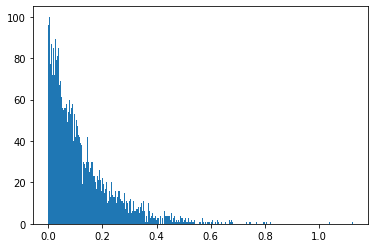

In [12]:
plt.hist(data, 1000);

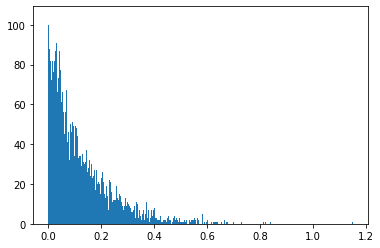

In [13]:
plt.hist(sim.log["IAT"],1000);

In [14]:
print(np.mean(data))
print(np.mean(sim.log["IAT"]))

0.12364045074585862
0.12491190051181034


In [15]:
b = q.kendall_notation

In [16]:
b[0:4]

'M/M/'

In [17]:
a = 'E2/E2/'

In [18]:
a[0:6]

'E2/E2/'